# Converting the execution time in nanoseconds to dataframe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import json

# Directory containing the JSON files
directory = './csvs'

# Dictionary to store DataFrames
dfs = {}

# Iterate through files ending with .json in the specified directory
counter = 0
for filename in os.listdir(directory):
    if filename.startswith('exec-time-history') and filename.endswith('.json'):
        counter += 1
        fp = os.path.join(directory, filename)
        # Read JSON file into a DataFrame
        dfs[str(counter)] = pd.read_json(fp)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './csvs'

In [ ]:
def plot_data(df, context):
    # Plot the data as a line graph

    features = [
        'greedy',
        'dijkstra',
        'astar',
        'bfs'
    ]

    plt.figure(figsize=(10, 5))
    plt.plot(df[features])
    plt.grid(True)
    plt.xlabel('N run')
    plt.ylabel('Execution Time (nanoseconds)')
    plt.title('Time Elapsed Over Time (%s)' % context)
    plt.legend(df.columns)
    plt.show()


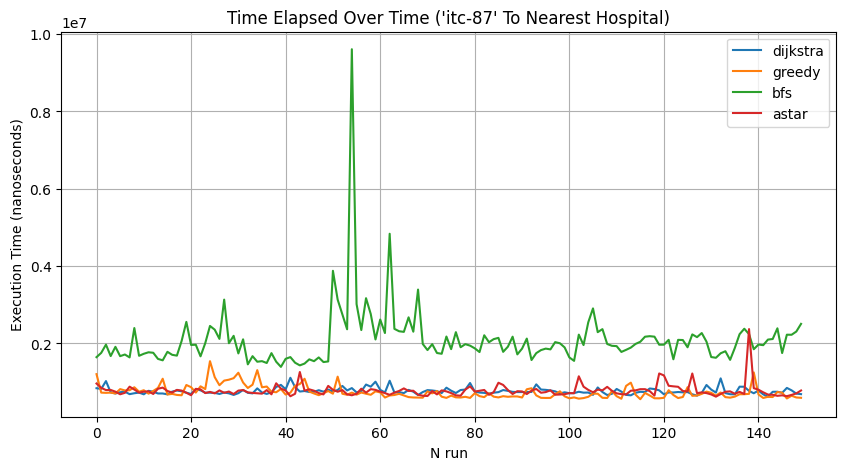

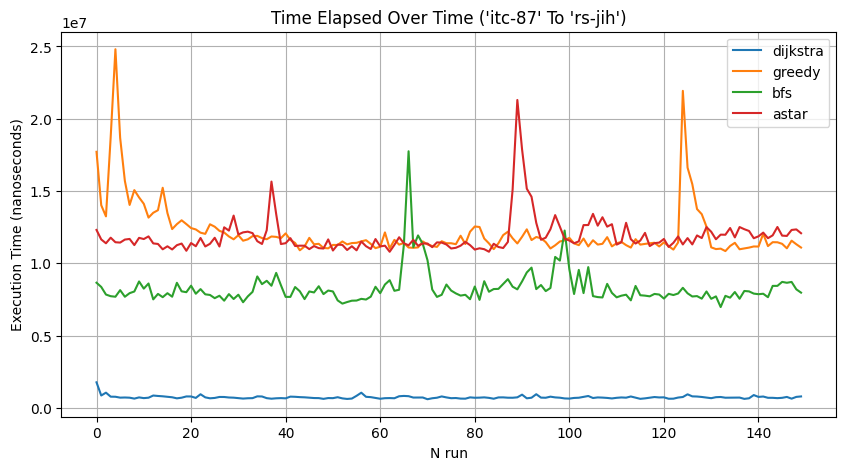

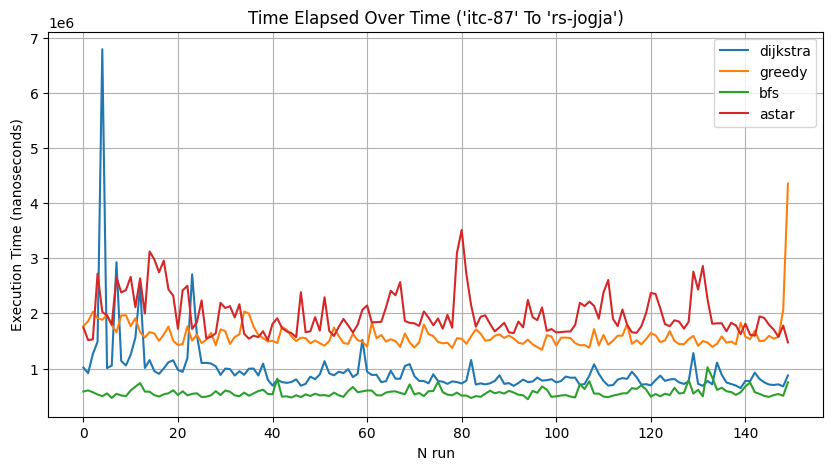

In [ ]:
# Plot the data
plot_data(dfs['1'], "'itc-87' To Nearest Hospital")
plot_data(dfs['2'], "'itc-87' To 'rs-jih'")
plot_data(dfs['3'], "'itc-87' To 'rs-jogja'")

In [ ]:
# Convert to csv
dfs['1'].to_csv('./results-csvs/itc-87_to_nearest_hospital.csv')
dfs['2'].to_csv('./results-csvs/itc-87_to_rs-jih.csv')
dfs['3'].to_csv('./results-csvs/itc-87_to_rs-jogja.csv')